## DBSCAN
- Relies on a density-based notion of cluster 
- Discovers clusters of arbitrary shape in spatial databases with noise 
### Basic Idea:
- Group together points in high-density 
- Mark as outliers points that lie alone in low-density regions 
Local point density at a point p is defined by two parameters: 
- ε radius for the neighborhood of point p: 
  - ε-Neighborhood: all points within a radius of ε from the point p 
  - Nε(p) := {q in data set D | dist(p, q) ≤ ε} 
- MinPts:minimum number of points in the given neighborhood N(p) 


In [62]:
import pandas as pd
import geopandas as gpd
import numpy as np
import itertools

import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
import seaborn as sns

import scipy.stats as stats
#from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN

In [63]:
acc = pd.read_csv('../data/cleaned/coll_coord.csv', low_memory=False)

In [64]:
# acc['latitude'][0]

In [65]:
# acc.info()

In [66]:
acc[['longitude','latitude']].isnull().sum()

longitude    0
latitude     0
dtype: int64

In [67]:
X = np.array(acc[['longitude','latitude']])

In [68]:
sel_size=20000
x=X[:sel_size]

In [69]:
clustering = DBSCAN(eps=0.001, min_samples=5).fit(x)

In [70]:
# clustering.fit(x)

In [71]:
l=clustering.labels_
len(np.unique(l))

636

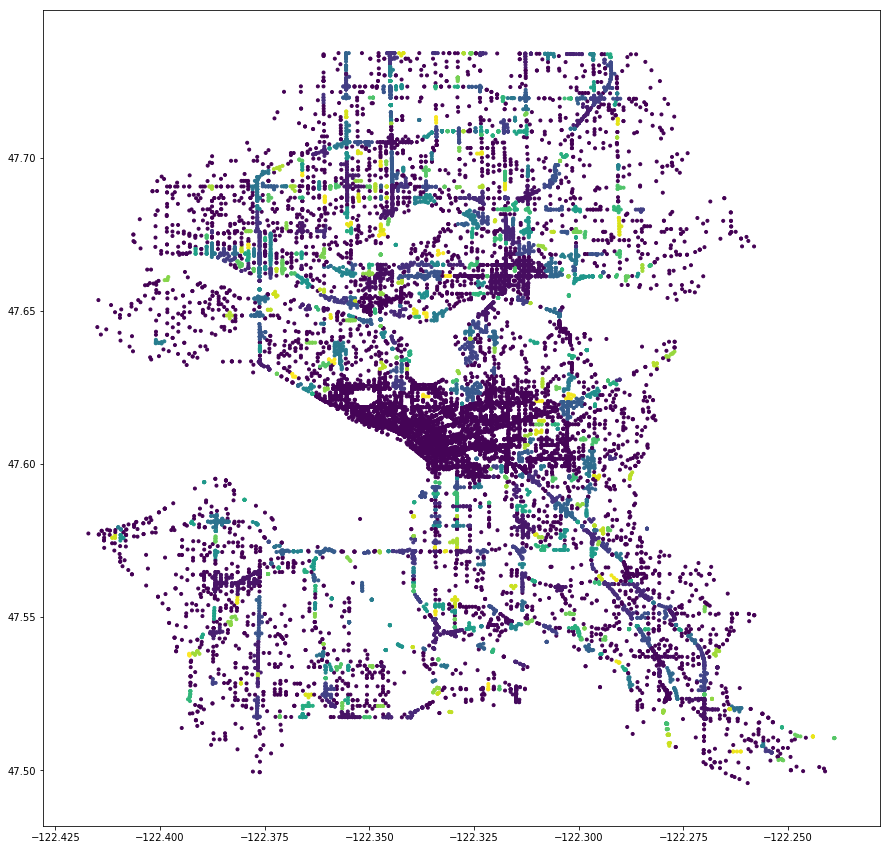

In [72]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x[:,0],x[:,1],c=l,marker='.')



#### Now let's exclude the non-clustered points (label = -1)

In [73]:
l_c = l[l!=-1]
l_c

array([0, 1, 2, ..., 5, 5, 5])

In [74]:
x_c=x[l!=-1,:]

In [75]:
len(x_c)

15618

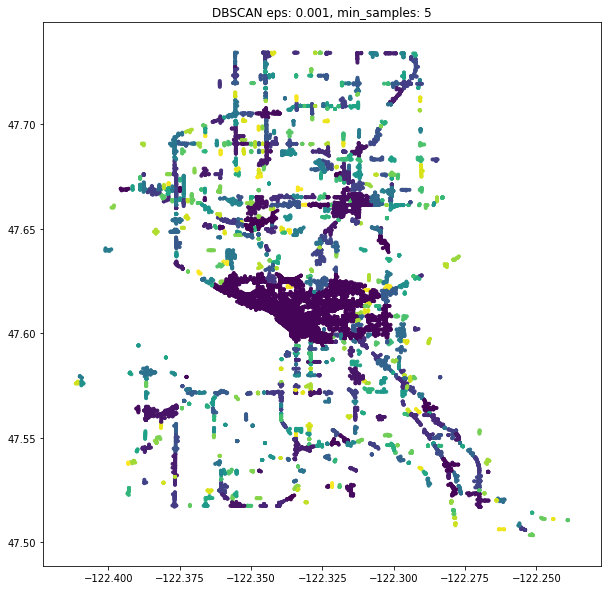

In [76]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x_c[:,0],x_c[:,1],c=l_c, marker='.')

plt.title('DBSCAN eps: 0.001, min_samples: 5')
plt.savefig('../images_part2/dbscan_001_5.png')

In [25]:
full_arr = np.array([x_c,l_c])

ValueError: could not broadcast input array from shape (15618,2) into shape (15618)

In [26]:
dfx = pd.DataFrame(x_c,columns=['longitude', 'latitude'])

In [27]:
dfx['cluster']=l_c

In [28]:
dfx.head(7)

,longitude,latitude,cluster
0,-122.319483,47.675997,0
1,-122.335570,47.521784,1
2,-122.347397,47.650966,2
3,-122.302059,47.641718,3
4,-122.287836,47.562818,4
5,-122.321550,47.605412,5
6,-122.325960,47.606036,5


In [29]:
dfx.groupby('cluster').count().head(7)

,longitude,latitude
cluster,,
0,15,15
1,18,18
2,161,161
3,65,65
4,68,68
5,5007,5007
6,11,11


In [30]:
dfx.groupby('cluster').count().head(7)[['longitude']].sort_values('longitude',ascending=False)

,longitude
cluster,
5,5007
2,161
4,68
3,65
1,18
0,15
6,11


In [77]:
dfx.groupby('cluster').count()[['longitude']].sort_values('longitude',ascending=False).head(15)

,longitude
cluster,
5,5007
21,504
2,161
33,123
39,109
72,100
12,95
20,94
173,93


In [32]:
cluster_counts= dfx.groupby('cluster').count()[['longitude']].sort_values('longitude',ascending=False)
cluster_counts.rename(index=int, columns={'longitude': 'point'}, inplace=True)

In [33]:
cluster_counts.head()

,point
cluster,
5,5007
21,504
2,161
33,123
39,109


In [39]:
l_c = l[l==5]
l_c

array([5, 5, 5, ..., 5, 5, 5])

In [40]:
x_c=x[l==5,:]

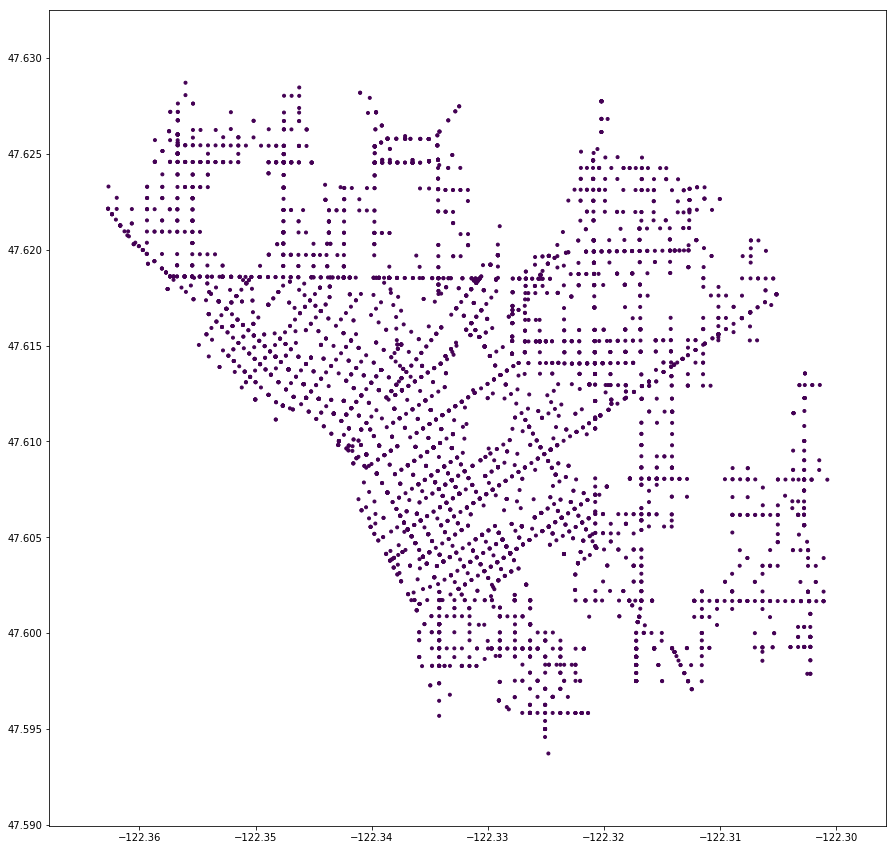

In [41]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x_c[:,0],x_c[:,1],c=l_c,marker='.')

In [42]:
l_c = l[(l==5) | (l==21) | (l==2) | (l==33)]

In [43]:
x_c=x[(l==5) | (l==21) | (l==2) | (l==33),:]

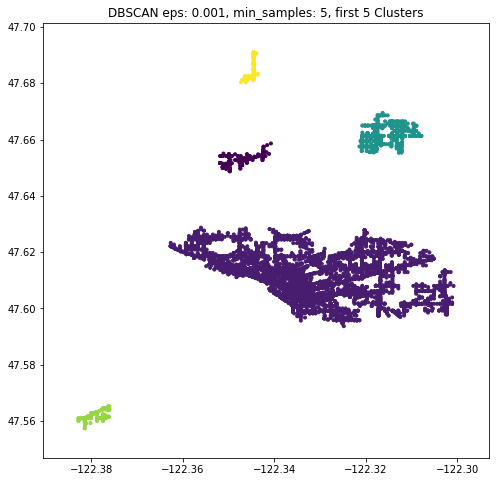

In [61]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x_c[:,0],x_c[:,1],c=l_c,marker='.')

plt.title('DBSCAN eps: 0.001, min_samples: 5, first 5 Clusters')
plt.savefig('../images_part2/dbscan_001_5.png')

In [45]:
l[(l==5) | (l==21) | (l==2) | (l==33)]

array([2, 5, 5, ..., 5, 5, 5])

In [46]:
[l[x] for x in [2,3,4]]

[2, -1, 3]

In [47]:
mask=np.isin(l,[2,3,4])

In [48]:
len(mask)

20000

In [49]:
l[mask]

array([2, 3, 4, 4, 3, 3, 4, 2, 3, 2, 2, 2, 2, 3, 4, 2, 4, 3, 4, 4, 2, 2,
       3, 3, 2, 2, 4, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 3, 4, 2, 3, 2, 3, 2, 2, 3, 2, 4, 2, 3, 4,
       4, 3, 3, 2, 3, 4, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 3, 3, 4, 4, 4, 2, 4, 2, 3, 2, 4, 2, 4, 3, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 4, 2, 4, 2, 3, 3, 2, 3, 4,
       4, 2, 3, 3, 2, 4, 2, 4, 2, 4, 3, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2,
       4, 2, 2, 3, 2, 2, 3, 3, 3, 2, 4, 2, 4, 2, 3, 3, 2, 2, 4, 2, 2, 4,
       3, 3, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 3, 2, 2, 2, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 3, 2, 3, 3, 3, 2, 3,
       4, 3, 2, 2, 2, 2, 2, 4, 2, 2, 4, 3, 2, 3, 4, 3, 2, 2, 4, 2, 3, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2,
       2, 3, 4, 3, 2, 2, 4, 4])

In [50]:
cluster_counts.head() #['cluster']

,point
cluster,
5,5007
21,504
2,161
33,123
39,109


In [51]:
cl_head=cluster_counts.head().index #['point']

In [52]:
5 in cluster_counts.head().index

True

In [53]:
mask = np.isin(l,cl_head)

In [54]:
mask

array([False, False,  True, ...,  True,  True,  True])

In [55]:
l_c=l[mask]
x_c=x[mask,:]

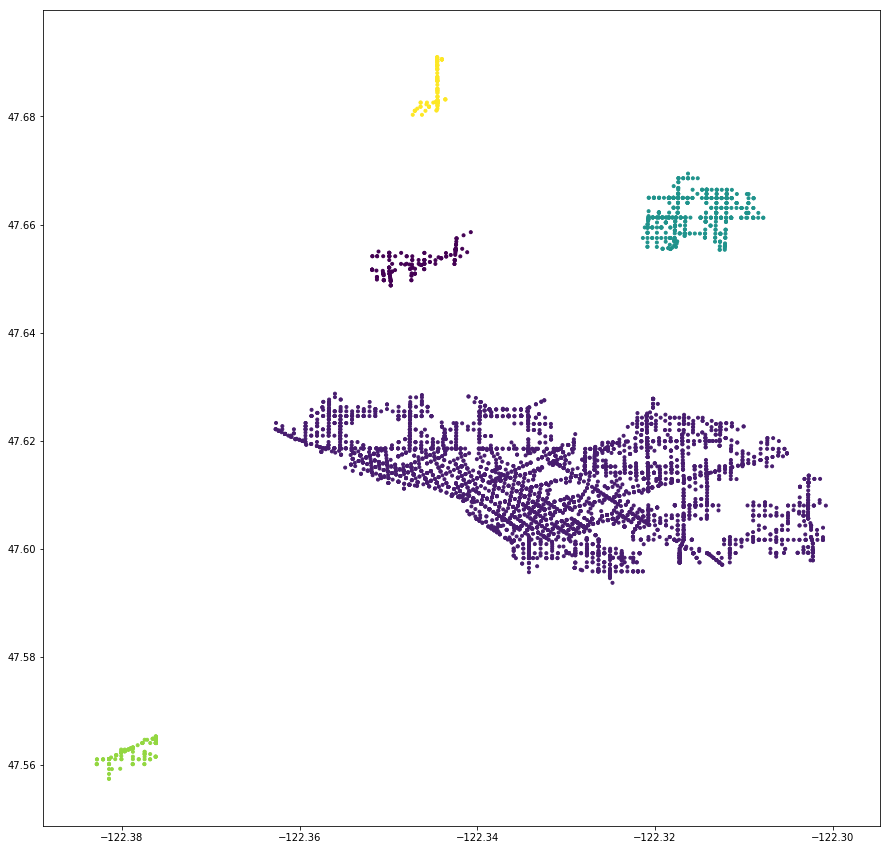

In [56]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x_c[:,0],x_c[:,1],c=l_c,marker='.')

In [220]:
n=min(22,len(cluster_counts))

In [221]:
n

22